# Spam message classification
Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, Random Forest or Support Vector Machine

Machine Learning Model to identify spam messages.

Ham - Not Spam
Spam - Is Spam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/SPAM/spam.csv", encoding = "latin1")

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
col = data.columns

In [ ]:
col

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data = data.drop(labels = {'Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'}, axis = 1)

In [ ]:
data = data.sample(frac = 1, random_state = 42)

In [ ]:
data['v1'] = data['v1'].replace({'ham' : 0, 'spam' : 1})

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(data.v2, data.v1 , test_size = 0.2, random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(4457, 4457, 1115, 1115)

In [ ]:
train_sentences[:10]

540     from www.Applausestore.com MonthlySubscription...
250          Ranjith cal drpd Deeraj and deepak 5min hold
1737    I cant pick the phone right now. Pls send a me...
4832    New Mobiles from 2004, MUST GO! Txt: NOKIA to ...
2548    Honestly i've just made a lovely cup of tea an...
4469    Lemme know when I can swing by and pick up, I'...
3413                              No pic. Please re-send.
1342               Yeah I'll try to scrounge something up
304     SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...
4500                                So wat's da decision?
Name: v2, dtype: object

In [ ]:
train_labels

540     1
250     0
1737    0
4832    1
2548    0
       ..
1008    0
2660    0
784     0
1636    0
1543    1
Name: v1, Length: 4457, dtype: int64

In [ ]:
baseline_model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("multiNB", MultinomialNB())
])
baseline_model.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('multiNB', MultinomialNB())])

In [ ]:
baseline_score1 = baseline_model.score(val_sentences, val_labels)
baseline_score1

0.9560538116591928

In [ ]:
baseline_model2 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("logReg", LogisticRegression())
])

baseline_model2.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('logReg', LogisticRegression())])

In [ ]:
baseline_score2 = baseline_model2.score(val_sentences, val_labels)
baseline_score2

0.967713004484305

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
baseline_model3= Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("svm", svm_classifier)
])

baseline_model3.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('svm', SVC(kernel='linear'))])

In [ ]:
baseline_score3 = baseline_model3.score(val_sentences, val_labels)
baseline_score3

0.9838565022421525

In [ ]:
svm_classifier2 = SVC(kernel='poly', degree = 3, C=1.0)
baseline_model4= Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("svm", svm_classifier2)
])

baseline_model4.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('svm', SVC(kernel='poly'))])

In [ ]:
baseline_score4 = baseline_model4.score(val_sentences, val_labels)
baseline_score4

0.9273542600896861

In [ ]:
dt_cls = DecisionTreeClassifier(random_state=42)

baseline_model5 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("decisionTree", dt_cls)
])

baseline_model5.fit(train_sentences, train_labels)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('decisionTree', DecisionTreeClassifier(random_state=42))])

In [ ]:
baseline_score5 = baseline_model5.score(val_sentences, val_labels)
baseline_score5

0.9524663677130045

In [ ]:
dt_rf = RandomForestClassifier(n_estimators=500, random_state=42)

baseline_model6 = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("randomForest", dt_rf)
])

baseline_model6.fit(train_sentences, train_labels)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('randomForest',
                 RandomForestClassifier(n_estimators=500, random_state=42))])

In [ ]:
baseline_score6 = baseline_model5.score(val_sentences, val_labels)
baseline_score6

0.9524663677130045

In [ ]:
accuracies = {'MultinomialNB': baseline_score1*100,
              'Logistic Regression' : baseline_score2*100,
              'SVM (Linear)' : baseline_score3*100,
              'SVM (Poly)' : baseline_score4*100,
              'Decision Tree' : baseline_score5*100,
              'Random Forest' : baseline_score6*100}
accuracies

{'MultinomialNB': 95.60538116591928,
 'Logistic Regression': 96.7713004484305,
 'SVM (Linear)': 98.38565022421525,
 'SVM (Poly)': 92.73542600896862,
 'Decision Tree': 95.24663677130046,
 'Random Forest': 95.24663677130046}

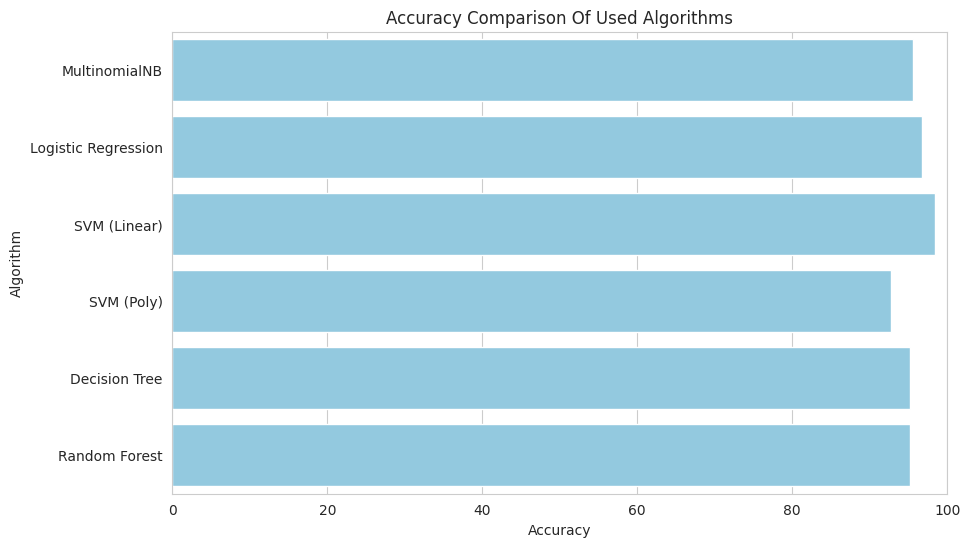

In [ ]:
data = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy'])
data.reset_index(inplace=True)
data.rename(columns={'index':'Algorithm'}, inplace=True)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.barplot(x='Accuracy', y='Algorithm', data=data, color='skyblue')

plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy Comparison Of Used Algorithms')
plt.xlim(0,100)
plt.show()